# **Applied Data Science Project Part 2**

# Twitter Sentiment Analyzer

## Anas Omary

**Objectives**
This project aims to create an interactive and user-friendly interface python and flask and implements machine learning to analyze the sentiment of twitter posts as well as the ability to provide a generic interface that returns the sentiment in three categories: positive, neutral and negative.

**Usefulness**
The main driver for this project is to give organizations the ability to analyze their brand and their presence on twitter social media platform and have clear view on their client’s feedback in real time. Ideally, the output of this project will be used by marketing and\or communication teams to measure effectiveness of marketing campaigns or to measure the effectiveness of new and existing services by understanding what their audience think of their campaigns and services.

**Dataset**
The data set that will be used to train and validate the model is the “sentiment140” dataset, it was created first in 2009 by Alec Go, Richa Bhayani, and Lei Huang, who were Computer Science graduate students at Stanford University as a class project from Stanford University.
The dataset contains 1,600,000 tweets extracted using the twitter API. The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment.
The dataset contains the following 6 fields:
1.	target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
2.	ids: The id of the tweet (e.g., 2087)
3.	date: the date of the tweet (e.g., Sat May 16 23:58:44 UTC 2009)
4.	flag: The query, if there is no query, then this value is NO_QUERY.
5.	user: the user that tweeted
6.	text: the text of the tweet


## EDA

1. Importing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anas502\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anas502\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
tweets_df=pd.read_csv(r'C:\Users\anas502\Desktop\Applied Data Science\Project\Data\training.1600000.processed.noemoticon.csv',encoding='latin-1',names=['target','ids','date','flag','user','text'],header=None)
tweets_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


2. Explore data

In [3]:
tweets_df.shape

(1600000, 6)

In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


**We will have to change column types from object to the correct type**

In [5]:
tweets_df = tweets_df.astype({"date": 'datetime64[ns]', "flag": 'string','user':'string','text':'string'})

C:\Users\anas502\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   target  1600000 non-null  int64         
 1   ids     1600000 non-null  int64         
 2   date    1600000 non-null  datetime64[ns]
 3   flag    1600000 non-null  string        
 4   user    1600000 non-null  string        
 5   text    1600000 non-null  string        
dtypes: datetime64[ns](1), int64(2), string(3)
memory usage: 73.2 MB


**Column types changed**

In [7]:
tweets_df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [8]:
tweets_df.describe(include='all')

C:\Users\anas502\AppData\Local\Temp\ipykernel_13640\2721621404.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweets_df.describe(include='all')


,target,ids,date,flag,user,text
count,1.600000e+06,1.600000e+06,1600000,1600000,1600000,1600000
unique,NaN,NaN,774363,1,659775,1581466
top,NaN,NaN,2009-06-15 12:53:14,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1600000,549,210
first,NaN,NaN,2009-04-06 22:19:45,NaN,NaN,NaN
last,NaN,NaN,2009-06-25 10:28:31,NaN,NaN,NaN
mean,2.000000e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935761e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467810e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN


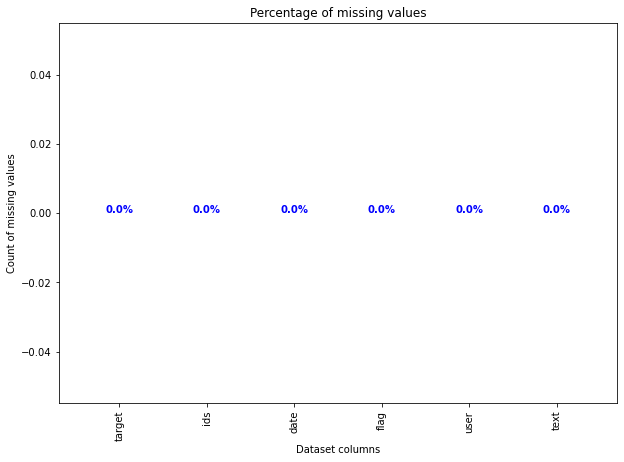

In [9]:
lst=[]
fig,ax=plt.subplots()
fig.set_size_inches([10,7])
for col in tweets_df.columns:
  ax.bar(col,tweets_df[col].isna().sum())
  lst.append(tweets_df[col].isna().sum())

for i,v in enumerate(lst):
    ax.text(i, v , str(round(v/tweets_df.shape[0],2)*100)+'%', color='blue', fontweight='bold',ha='center')
    #ax.text(i-.25, v-2 , str(v)+'('+str(round(v/8807,2)*100)+'%)', color='blue', fontweight='bold')
ax.set_xticks(tweets_df.columns)
ax.set_xticklabels(tweets_df.columns,rotation=90)
ax.set_xlabel('Dataset columns')
ax.set_ylabel('Count of missing values')
ax.set_title('Percentage of missing values')
plt.show()

**There is no missing data**

In [10]:
df_duplicated=tweets_df[tweets_df.duplicated()]
df_duplicated.head()

,target,ids,date,flag,user,text


**There are no duplicate rows**

In [11]:
tweets_df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,Need a hug
7,0,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,@twittera que me muera ?


In [12]:
#in the following code I will extract year and month from the date column into new columns.
tweets_df['year'] = pd.DatetimeIndex(tweets_df['date']).year
tweets_df['month'] = pd.DatetimeIndex(tweets_df['date']).month
tweets_df['day'] = pd.DatetimeIndex(tweets_df['date']).day
tweets_df.head(20)

,target,ids,date,flag,user,text,year,month,day
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6
5,0,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009,4,6
6,0,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,Need a hug,2009,4,6
7,0,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,2009,4,6
8,0,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,2009,4,6
9,0,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,@twittera que me muera ?,2009,4,6


C:\Users\anas502\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month'>

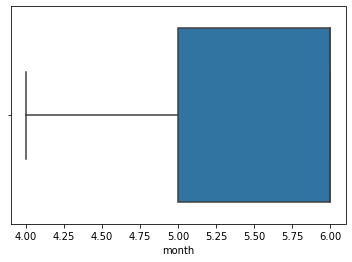

In [13]:
sns.boxplot(tweets_df['month']) 

C:\Users\anas502\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day'>

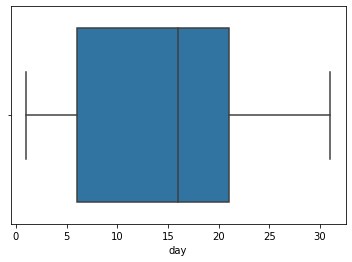

In [14]:
sns.boxplot(tweets_df['day']) 

**The nature of the dataset implies that an outlier analysis is not applicable, in all cases I cound that there are no outliers in the month and day**

**Next I will show the distribution of tweets by sentiment**

Text(0.5, 1.0, 'Dataset labels distribuition')

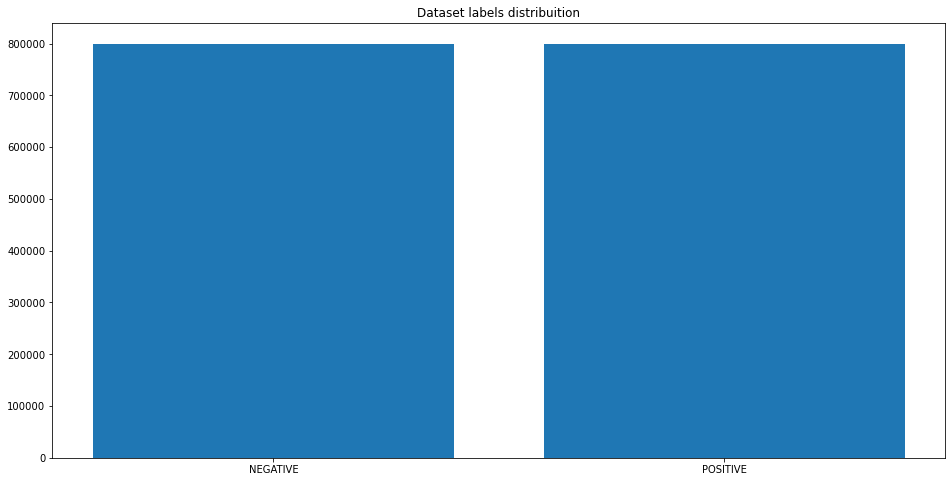

In [15]:
#Map target label to String
#0 -> NEGATIVE
#2 -> NEUTRAL
#4 -> POSITIVE
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(float(label))]
tweets_df.target = tweets_df.target.apply(lambda x: decode_sentiment(x))
target_cnt = Counter(tweets_df.target)
plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

**we can see that the dataset is balanced in terms of the distribution of target values**

## Data Processing:
**I will perfrom the following transformations to the tweet text:**

1- Removing mentions (@username) from the text

2- Lowercase all text

3- Short Word Lookup

4- Emoticon Lookup

5- Replacing Special Characters with space

6- Removing stop words


**Removing "@user" from all the tweets**

In [16]:
#Removing "@user" from all the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
tweets_df['text'] = np.vectorize(remove_pattern)(tweets_df['text'], "@[\w]*")
tweets_df.head(10)

,target,ids,date,flag,user,text,year,month,day
0,NEGATIVE,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"http://twitpic.com/2y1zl - Awww, that's a bum...",2009,4,6
1,NEGATIVE,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6
2,NEGATIVE,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,2009,4,6
3,NEGATIVE,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6
4,NEGATIVE,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",2009,4,6
5,NEGATIVE,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,6
6,NEGATIVE,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,Need a hug,2009,4,6
7,NEGATIVE,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,"hey long time no see! Yes.. Rains a bit ,onl...",2009,4,6
8,NEGATIVE,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,nope they didn't have it,2009,4,6
9,NEGATIVE,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,que me muera ?,2009,4,6


**Changing all the tweets into lowercase**

In [17]:
#Changing all the tweets into lowercase
tweets_df['text'] = tweets_df['text'].apply(lambda x: x.lower())
tweets_df.head(10)

,target,ids,date,flag,user,text,year,month,day
0,NEGATIVE,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"http://twitpic.com/2y1zl - awww, that's a bum...",2009,4,6
1,NEGATIVE,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,2009,4,6
2,NEGATIVE,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,i dived many times for the ball. managed to s...,2009,4,6
3,NEGATIVE,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6
4,NEGATIVE,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",2009,4,6
5,NEGATIVE,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,6
6,NEGATIVE,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,need a hug,2009,4,6
7,NEGATIVE,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,"hey long time no see! yes.. rains a bit ,onl...",2009,4,6
8,NEGATIVE,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,nope they didn't have it,2009,4,6
9,NEGATIVE,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,que me muera ?,2009,4,6


**Correcting short words**

In [18]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [19]:
#Correcting short word
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}
tweets_df['text'] = tweets_df['text'].apply(lambda x: lookup_dict(x,short_word_dict))
tweets_df.head(10)

,target,ids,date,flag,user,text,year,month,day
0,NEGATIVE,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"http://twitpic.com/2y1zl - awww, that's a bum...",2009,4,6
1,NEGATIVE,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,2009,4,6
2,NEGATIVE,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,i dived many times for the ball. managed to s...,2009,4,6
3,NEGATIVE,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6
4,NEGATIVE,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",2009,4,6
5,NEGATIVE,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,6
6,NEGATIVE,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,need a hug,2009,4,6
7,NEGATIVE,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,"hey long time no see! yes.. rains a bit ,onl...",2009,4,6
8,NEGATIVE,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,nope they didn't have it,2009,4,6
9,NEGATIVE,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,que me muera ?,2009,4,6


In [20]:
#Replacing emoticon with corresponding word
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
tweets_df['text'] = tweets_df['text'].apply(lambda x: lookup_dict(x,emoticon_dict))
tweets_df.head(10)

,target,ids,date,flag,user,text,year,month,day
0,NEGATIVE,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"http://twitpic.com/2y1zl - awww, that's a bum...",2009,4,6
1,NEGATIVE,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,2009,4,6
2,NEGATIVE,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,i dived many times for the ball. managed to s...,2009,4,6
3,NEGATIVE,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6
4,NEGATIVE,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",2009,4,6
5,NEGATIVE,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,6
6,NEGATIVE,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,need a hug,2009,4,6
7,NEGATIVE,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,"hey long time no see! yes.. rains a bit ,onl...",2009,4,6
8,NEGATIVE,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,nope they didn't have it,2009,4,6
9,NEGATIVE,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,que me muera ?,2009,4,6


**Removing special characters**

In [21]:
#Removing special characters
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub(r"@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+",' ',x))
tweets_df.head(10)

,target,ids,date,flag,user,text,year,month,day
0,NEGATIVE,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww that s a bummer you shoulda got david ...,2009,4,6
1,NEGATIVE,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can t update his facebook by ...,2009,4,6
2,NEGATIVE,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,i dived many times for the ball managed to sa...,2009,4,6
3,NEGATIVE,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6
4,NEGATIVE,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,no it s not behaving at all i m mad why am i ...,2009,4,6
5,NEGATIVE,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,6
6,NEGATIVE,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,need a hug,2009,4,6
7,NEGATIVE,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,hey long time no see yes rains a bit only a b...,2009,4,6
8,NEGATIVE,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,nope they didn t have it,2009,4,6
9,NEGATIVE,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,que me muera,2009,4,6


**Removing punctuations**

In [22]:
import string
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [23]:
tweets_df['text'] = tweets_df['text'].apply(remove_punc)
tweets_df.head(10)

,target,ids,date,flag,user,text,year,month,day
0,NEGATIVE,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww that s a bummer you shoulda got david ...,2009,4,6
1,NEGATIVE,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can t update his facebook by ...,2009,4,6
2,NEGATIVE,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,i dived many times for the ball managed to sa...,2009,4,6
3,NEGATIVE,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6
4,NEGATIVE,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,no it s not behaving at all i m mad why am i ...,2009,4,6
5,NEGATIVE,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,6
6,NEGATIVE,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,need a hug,2009,4,6
7,NEGATIVE,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,hey long time no see yes rains a bit only a b...,2009,4,6
8,NEGATIVE,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,nope they didn t have it,2009,4,6
9,NEGATIVE,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,que me muera,2009,4,6


**Removing stop words**

In [24]:
# Removing stop words
from nltk.tokenize import word_tokenize
tweets_df['text_token'] = tweets_df['text'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
tweets_df['text_token_no_stop'] = tweets_df['text_token'].apply(lambda x: [word for word in x if not word in stop_words])

tweets_df.head(10)

,target,ids,date,flag,user,text,year,month,day,text_token,text_token_no_stop
0,NEGATIVE,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww that s a bummer you shoulda got david ...,2009,4,6,"[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, bummer, shoulda, got, david, carr, thir..."
1,NEGATIVE,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can t update his facebook by ...,2009,4,6,"[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,..."
2,NEGATIVE,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,i dived many times for the ball managed to sa...,2009,4,6,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ..."
3,NEGATIVE,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,NEGATIVE,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,no it s not behaving at all i m mad why am i ...,2009,4,6,"[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]"
5,NEGATIVE,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,6,"[not, the, whole, crew]","[whole, crew]"
6,NEGATIVE,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,need a hug,2009,4,6,"[need, a, hug]","[need, hug]"
7,NEGATIVE,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,hey long time no see yes rains a bit only a b...,2009,4,6,"[hey, long, time, no, see, yes, rains, a, bit,...","[hey, long, time, see, yes, rains, bit, bit, l..."
8,NEGATIVE,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,nope they didn t have it,2009,4,6,"[nope, they, didn, t, have, it]",[nope]
9,NEGATIVE,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,que me muera,2009,4,6,"[que, me, muera]","[que, muera]"


In [25]:
tweets_df.head(10)

,target,ids,date,flag,user,text,year,month,day,text_token,text_token_no_stop
0,NEGATIVE,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww that s a bummer you shoulda got david ...,2009,4,6,"[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, bummer, shoulda, got, david, carr, thir..."
1,NEGATIVE,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can t update his facebook by ...,2009,4,6,"[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,..."
2,NEGATIVE,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,i dived many times for the ball managed to sa...,2009,4,6,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ..."
3,NEGATIVE,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,NEGATIVE,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,no it s not behaving at all i m mad why am i ...,2009,4,6,"[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]"
5,NEGATIVE,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,6,"[not, the, whole, crew]","[whole, crew]"
6,NEGATIVE,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,need a hug,2009,4,6,"[need, a, hug]","[need, hug]"
7,NEGATIVE,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,hey long time no see yes rains a bit only a b...,2009,4,6,"[hey, long, time, no, see, yes, rains, a, bit,...","[hey, long, time, see, yes, rains, bit, bit, l..."
8,NEGATIVE,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,nope they didn t have it,2009,4,6,"[nope, they, didn, t, have, it]",[nope]
9,NEGATIVE,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,que me muera,2009,4,6,"[que, me, muera]","[que, muera]"


In [26]:
#stemming tweets: taking the basic word for each word in tweet, example texting=text
stemming = PorterStemmer()
tweets_df['text_stemmed'] = tweets_df['text_token_no_stop'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
tweets_df.head(10)

,target,ids,date,flag,user,text,year,month,day,text_token,text_token_no_stop,text_stemmed
0,NEGATIVE,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww that s a bummer you shoulda got david ...,2009,4,6,"[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, bummer, shoulda, got, david, carr, thir...",awww bummer shoulda got david carr third day
1,NEGATIVE,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can t update his facebook by ...,2009,4,6,"[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,...",upset updat facebook text might cri result sch...
2,NEGATIVE,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,i dived many times for the ball managed to sa...,2009,4,6,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ...",dive mani time ball manag save 50 rest go bound
3,NEGATIVE,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]",whole bodi feel itchi like fire
4,NEGATIVE,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,no it s not behaving at all i m mad why am i ...,2009,4,6,"[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]",behav mad see
5,NEGATIVE,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,6,"[not, the, whole, crew]","[whole, crew]",whole crew
6,NEGATIVE,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,need a hug,2009,4,6,"[need, a, hug]","[need, hug]",need hug
7,NEGATIVE,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,hey long time no see yes rains a bit only a b...,2009,4,6,"[hey, long, time, no, see, yes, rains, a, bit,...","[hey, long, time, see, yes, rains, bit, bit, l...",hey long time see ye rain bit bit laugh loud f...
8,NEGATIVE,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,nope they didn t have it,2009,4,6,"[nope, they, didn, t, have, it]",[nope],nope
9,NEGATIVE,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,que me muera,2009,4,6,"[que, me, muera]","[que, muera]",que muera


In [27]:
# only combining text tokens into sentence
tweets_df['text_token_no_stop_free'] = tweets_df['text_token_no_stop'].apply(lambda x: ' '.join(x))
tweets_df.head(10)

,target,ids,date,flag,user,text,year,month,day,text_token,text_token_no_stop,text_stemmed,text_token_no_stop_free
0,NEGATIVE,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww that s a bummer you shoulda got david ...,2009,4,6,"[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, bummer, shoulda, got, david, carr, thir...",awww bummer shoulda got david carr third day,awww bummer shoulda got david carr third day
1,NEGATIVE,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can t update his facebook by ...,2009,4,6,"[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,...",upset updat facebook text might cri result sch...,upset update facebook texting might cry result...
2,NEGATIVE,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,i dived many times for the ball managed to sa...,2009,4,6,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ...",dive mani time ball manag save 50 rest go bound,dived many times ball managed save 50 rest go ...
3,NEGATIVE,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]",whole bodi feel itchi like fire,whole body feels itchy like fire
4,NEGATIVE,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,no it s not behaving at all i m mad why am i ...,2009,4,6,"[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]",behav mad see,behaving mad see
5,NEGATIVE,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,6,"[not, the, whole, crew]","[whole, crew]",whole crew,whole crew
6,NEGATIVE,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,need a hug,2009,4,6,"[need, a, hug]","[need, hug]",need hug,need hug
7,NEGATIVE,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,hey long time no see yes rains a bit only a b...,2009,4,6,"[hey, long, time, no, see, yes, rains, a, bit,...","[hey, long, time, see, yes, rains, bit, bit, l...",hey long time see ye rain bit bit laugh loud f...,hey long time see yes rains bit bit laugh loud...
8,NEGATIVE,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,nope they didn t have it,2009,4,6,"[nope, they, didn, t, have, it]",[nope],nope,nope
9,NEGATIVE,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,que me muera,2009,4,6,"[que, me, muera]","[que, muera]",que muera,que muera


## Word cloud visualization
**lets see which words are the most occuring in each negative and positive tweets**

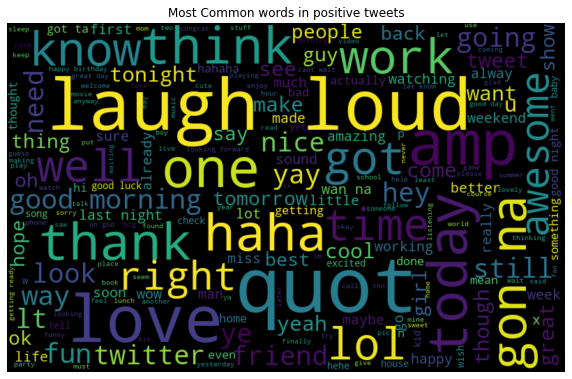

In [33]:
#Most occuring words in positive tweets
all_words = ' '.join([text for text in tweets_df[tweets_df['target']=='POSITIVE']['text_token_no_stop_free']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in positive tweets")
plt.show()

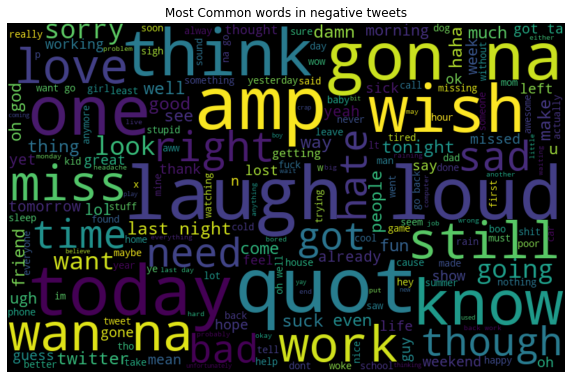

In [34]:
#Most occuring words in Negative tweets
all_words = ' '.join([text for text in tweets_df[tweets_df['target']=='NEGATIVE']['text_token_no_stop_free']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in negative tweets")
plt.show()

## Saving Dataframe

In [ ]:
#Save Dataframe
tweets_df.to_pickle('processed_tweets.pkl')

## Supervised technique
**In this project I will implement NLTK**

In [ ]:
#Loading Dataframe
df = pd.read_pickle('processed_tweets.pkl')

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [ ]:
sentences = pd.DataFrame(tweets_df['text_token_no_stop_free'])
neg = []
neu = []
pos = []
compound = []
sentiment = []


for index, row in sentences.iterrows():
    sentiment = str((analyser.polarity_scores(row)))
    sentiment = sentiment.replace('{','').replace('}','').replace("'neg':",'').replace("'neu':",'').replace("'pos':",'').replace("'compound':",'')
    neg.append(float(sentiment.split(',')[0]))    
    neu.append(float(sentiment.split(',')[1]))
    pos.append(float(sentiment.split(',')[2]))
    compound.append(float(sentiment.split(',')[3]))

pandemic['neg']=neg
pandemic['neu']=neu
pandemic['pos']=pos
pandemic['compound']=compound